# Introduction to the Quantum Bit
### Where we'll explore:
* **Quantum Superposition**
* **Quantum Entanglement**
* **Running experiments on a laptop-hosted simulator**
* **Running experiments on a real quantum computer**

### Brandon Warren
### SDE, Zonar Systems
github.com/brandonwarren/intro-to-qubit contains this Jupyter notebook and installation tips.

In [1]:
import py_cas_slides as slides

loaded


In [2]:
# real 6-qubit quantum computer, incl interface electronics
slides.system()

In [3]:
# import QISkit, define function to set backend that will execute our circuits

HISTO_SIZE = (9,4)  # width, height in inches
CIRCUIT_SIZE = 1.0  # scale (e.g. 0.5 is half-size)

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit import BasicAer as Aer
from qiskit.tools.visualization import plot_histogram
from qiskit import __qiskit_version__

print(__qiskit_version__)

def set_backend(use_simulator: bool, n_qubits: int, preferred_backend: str=''):
    if use_simulator:
        backend = Aer.get_backend('qasm_simulator')
    else:
        from qiskit import IBMQ
        provider = IBMQ.load_account()
        if preferred_backend:
            # use backend specified by caller
            backend = provider.get_backend(preferred_backend)
            print(f"Using {backend.name()}")
        else:
            # use least-busy backend that has enough qubits
            from qiskit.providers.ibmq import least_busy
            large_enough_devices = provider.backends(filters=lambda x: x.configuration().n_qubits >= n_qubits and not x.configuration().simulator)
            backend = least_busy(large_enough_devices)
            print(f"The best backend is {backend.name()}")
    return backend

def add_missing_keys(counts):
    # we want all keys present in counts, even if they are zero value
    for key in ['00', '01', '10', '11']:
        if key not in counts:
            counts[key] = 0

{'qiskit-terra': '0.11.1', 'qiskit-aer': '0.3.4', 'qiskit-ignis': '0.2.0', 'qiskit-ibmq-provider': '0.4.5', 'qiskit-aqua': '0.6.2', 'qiskit': '0.14.1'}


In [4]:
# use simulator for now
backend = set_backend(use_simulator=True, n_qubits=2)

In [5]:
# write code to build this quantum circuit
# logic flows left to right
# quantum bits begin in ground state (zero)
# measurement copies result to classical bit
slides.simple_2qubits()  # simplest possible 2-qubit circuit

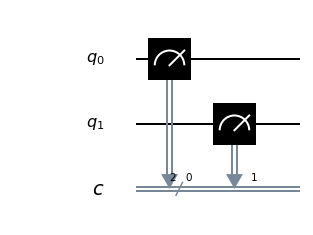

In [6]:
# 1. Build simplest possible 2-qubit quantum circuit and draw it

q_reg = QuantumRegister(2, 'q')    # the 2 qubits we'll be using
c_reg = ClassicalRegister(2, 'c')  # clasical bits to hold results of measurements

circuit = QuantumCircuit(q_reg, c_reg)  # begin circuit - just 2 qubits and 2 classical bits

# measure while still in ground state
circuit.measure(q_reg, c_reg)      # measure qubits, place results in classical bits

# circuit is now complete
circuit.draw(output='mpl', scale=CIRCUIT_SIZE)

{'00': 1000}
{'00': 1000, '01': 0, '10': 0, '11': 0}


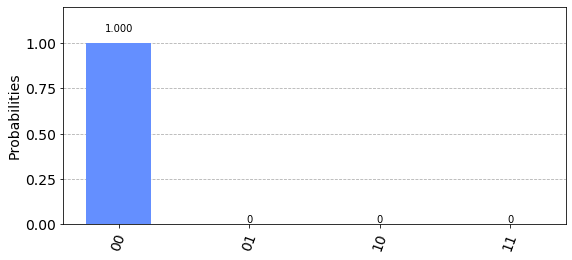

In [7]:
# run it 1000 times on simulator
result = execute(circuit, backend=backend, shots=1000).result()
counts = result.get_counts(circuit)
print(counts)
add_missing_keys(counts)
print(counts)
plot_histogram(counts, figsize=HISTO_SIZE)

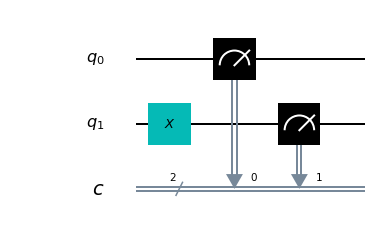

In [8]:
# 2. Apply X gate (NOT gate) to high qubit (q1)

q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')

circuit = QuantumCircuit(q_reg, c_reg)

###### apply X gate to high qubit ######
circuit.x(q_reg[1])

circuit.measure(q_reg, c_reg)

circuit.draw(output='mpl', scale=CIRCUIT_SIZE)

{'10': 1000}


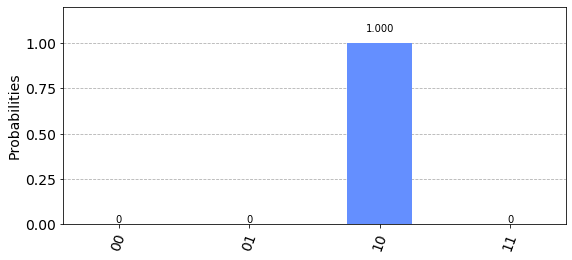

In [9]:
# run it 1000 times on simulator
result = execute(circuit, backend=backend, shots=1000).result()
counts = result.get_counts(circuit)
print(counts)
add_missing_keys(counts)
plot_histogram(counts, figsize=HISTO_SIZE)

In [10]:
# We've seen the two simplest quantum circuits possible.
# Let's take it up a notch and place each qubit into a quantum superposition.
# ?
slides.super_def()

In [11]:
# Like you flip a coin - while it is spinning it is H and T.
# When you catch it, it is H or T. 
# BUT: it is as if it was that way all along. 
# What's the difference between that, and a coin under a
# piece of paper that is revealed?
slides.feynman_quote()

In [12]:
slides.double_slit()
# (2)

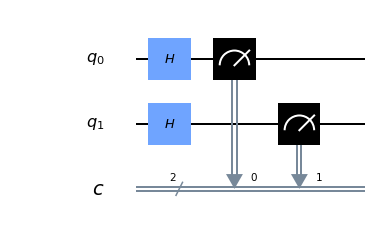

In [13]:
# Like the photon that is in 2 places at once, the qubit can
# be in 2 states at once, and become 0 or 1 when it is measured.

# Let's place our 2 qubits in superposion and measure them.
# The act of measurement collapses the superposition,
# resulting in 1 of the 2 possible values.

# H - Hadamard will turn our 0 into a superposition of 0 and 1.
# It rotates the state of the qubit.
# (coin over table analogy)

# 3. Apply H gate to both qubits

q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')

circuit = QuantumCircuit(q_reg, c_reg)

###### apply H gate to both qubits ######
circuit.h(q_reg[0])
circuit.h(q_reg[1])

circuit.measure(q_reg, c_reg)

circuit.draw(output='mpl', scale=CIRCUIT_SIZE)

{'00': 245, '01': 262, '10': 228, '11': 265}


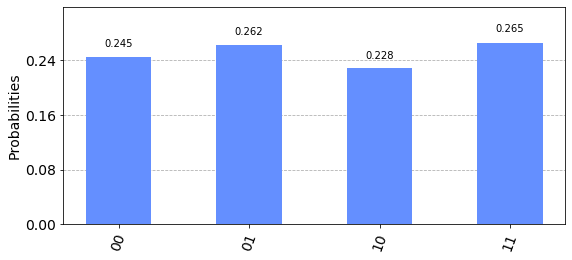

In [14]:
# histo - 2 bits x 2 possibilities = 4 combinations of equal probability
result = execute(circuit, backend=backend, shots=1000).result()
counts = result.get_counts(circuit)
print(counts)
add_missing_keys(counts)
plot_histogram(counts, figsize=HISTO_SIZE)
# TRUE random numbers! (when run on real device)

In [15]:
# Special case of superposition, entanglement, revealed by EPR expmt
slides.mermin_quote()

In [16]:
# Before we get to that, i'd like to set the stage by intro
# 2 concepts: locality and hidden variables.
# The principle of locality says that for one thing to affect
# another, they have to be in the same location, or need some
# kind of field or signal connecting the two, with
# the fastest possible propagation speed being that of light. 
# This even applies to gravity, which prop at the speed of light.
# [We are 8 light-minutes from the Sun, so if the Sun all of a
# sudden vanished somehow, we would still orbit for another 8 min.]
# 
# Even though Einstein helped launch the new field of QM, he never
# really liked it. In particular, he couln't accept the randomness.
slides.einstein_dice()

In [17]:
slides.bohr_response()

In [18]:
# (3)
slides.epr_nyt()

In [19]:
# (4)
slides.einstein_vs_bohr()

Einstein camp,Bohr camp / Quantum theory
locality,"entanglement E:""spooky action at a distance"""
"realism E:""The moon is there even if I am not looking at it.""",reality doesn’t exist until it is measured
"deterministic / hidden variables E:""God does not play dice""",superposition / random
makes sense,strange


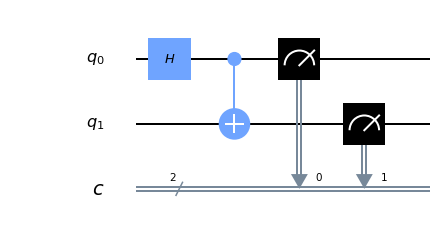

In [20]:
# [Describe entanglement using coins odd,even]
# 4. Entanglement - even-parity

q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')

circuit = QuantumCircuit(q_reg, c_reg)

###### place q[0] in superposition ######
circuit.h(q_reg[0])

###### CNOT gate - control=q[0] target=q[1] - places into even-parity Bell state
# Target is inverted if control is true
circuit.cx(q_reg[0], q_reg[1])

circuit.measure(q_reg, c_reg)

circuit.draw(output='mpl', scale=CIRCUIT_SIZE)

{'00': 507, '11': 493}


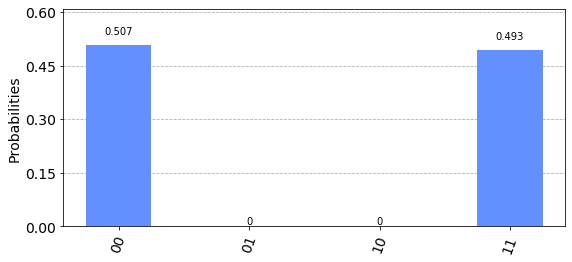

In [21]:
result = execute(circuit, backend=backend, shots=1000).result()
counts = result.get_counts(circuit)
print(counts)
add_missing_keys(counts)
plot_histogram(counts, figsize=HISTO_SIZE)

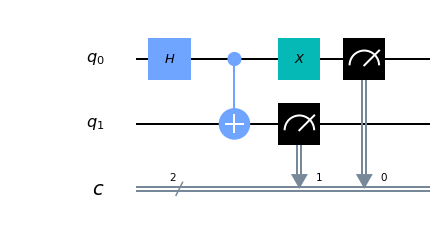

In [22]:
# 5. Entanglement - odd-parity

q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')

circuit = QuantumCircuit(q_reg, c_reg)

###### place q[0] in superposition ######
circuit.h(q_reg[0])

###### CNOT gate - control=q[0] target=q[1] - places into even-parity Bell state
# Target is inverted if control is true
circuit.cx(q_reg[0], q_reg[1])

# a 0/1 superposition is converted to a 1/0 superposition
# i.e. rotates state 180 degrees
# creates odd-parity entanglement
circuit.x(q_reg[0])

circuit.measure(q_reg, c_reg)

circuit.draw(output='mpl', scale=CIRCUIT_SIZE)

{'01': 512, '10': 488}


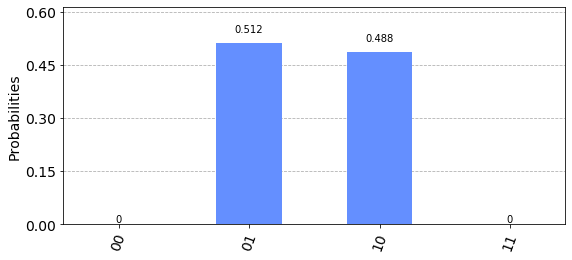

In [23]:
result = execute(circuit, backend=backend, shots=1000).result()
counts = result.get_counts(circuit)
print(counts)
add_missing_keys(counts)
plot_histogram(counts, figsize=HISTO_SIZE)

In [24]:
# (5)
slides.Bell_CHSH_inequality()

In [25]:
# Let's run the Bell expmt on a real device.
# This will not be a simulation!
# backend = set_backend(use_simulator=False, n_qubits=2)  # 1st avail is RISKY
backend = set_backend(use_simulator=False, n_qubits=2, preferred_backend='ibmq_ourense')

Using ibmq_ourense


Circuit to measure ZZ (A=Z=0° B=Z=0°) - NOT part of Bell expmt


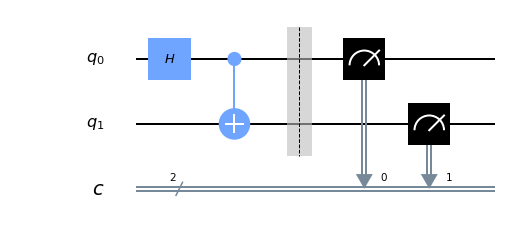

In [26]:
# [quickly: draw circuits, execute, then go over code and circuits]

# 6. Bell experiment

import numpy as np

# Define the Quantum and Classical Registers
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')

# create Bell state
bell = QuantumCircuit(q, c)
bell.h(q[0])         # place q[0] in superposition
bell.cx(q[0], q[1])  # CNOT gate - control=q[0] target=q[1] - places into even-parity Bell state

# setup measurement circuits

# ZZ not used for Bell inequality, but interesting for real device (i.e. not perfect)
meas_zz = QuantumCircuit(q, c)
meas_zz.barrier()
meas_zz.measure(q, c)

# ZW: A=Z=0° B=W=45°
meas_zw = QuantumCircuit(q, c)
meas_zw.barrier()
meas_zw.s(q[1])
meas_zw.h(q[1])
meas_zw.t(q[1])
meas_zw.h(q[1])
meas_zw.measure(q, c)

# ZV: A=Z=0° B=V=-45°
meas_zv = QuantumCircuit(q, c)
meas_zv.barrier()
meas_zv.s(q[1])
meas_zv.h(q[1])
meas_zv.tdg(q[1])
meas_zv.h(q[1])
meas_zv.measure(q, c)

# XW: A=X=90° B=W=45°
meas_xw = QuantumCircuit(q, c)
meas_xw.barrier()
meas_xw.h(q[0])
meas_xw.s(q[1])
meas_xw.h(q[1])
meas_xw.t(q[1])
meas_xw.h(q[1])
meas_xw.measure(q, c)

# XV: A=X=90° B=V=-45° - instead of being 45° diff,
# they are 90°+45°=135° = 180°-45°,
# which is why the correlation is negative and we negate it
# before adding the the rest of the correlations.
meas_xv = QuantumCircuit(q, c)
meas_xv.barrier()
meas_xv.h(q[0])
meas_xv.s(q[1])
meas_xv.h(q[1])
meas_xv.tdg(q[1])
meas_xv.h(q[1])
meas_xv.measure(q, c)

# build circuits
circuits = []
labels = []
ab_labels = []
circuits.append(bell + meas_zz)
labels.append('ZZ')
ab_labels.append("")  # not used
circuits.append(bell + meas_zw)
labels.append('ZW')
ab_labels.append("<AB>")
circuits.append(bell + meas_zv)
labels.append('ZV')
ab_labels.append("<AB'>")
circuits.append(bell + meas_xw)
labels.append('XW')
ab_labels.append("<A'B>")
circuits.append(bell + meas_xv)
labels.append('XV')
ab_labels.append("<A'B'>")

print("Circuit to measure ZZ (A=Z=0° B=Z=0°) - NOT part of Bell expmt")
circuits[0].draw(output='mpl', scale=CIRCUIT_SIZE)

Circuit to measure ZW (A=Z=0° B=W=45°)
The gates to the right of the vertical bar rotate the measurement axis.


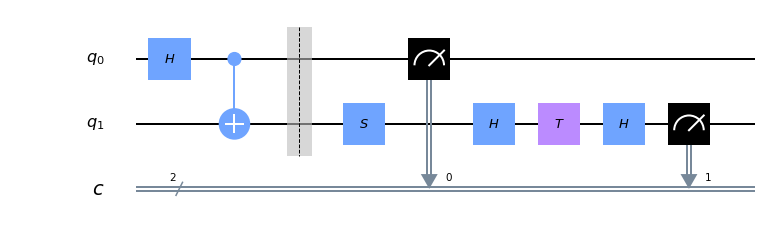

In [27]:
print("Circuit to measure ZW (A=Z=0° B=W=45°)")
print("The gates to the right of the vertical bar rotate the measurement axis.")
circuits[1].draw(output='mpl', scale=CIRCUIT_SIZE)

Circuit to measure ZV (A=Z=0° B=V=-45°)


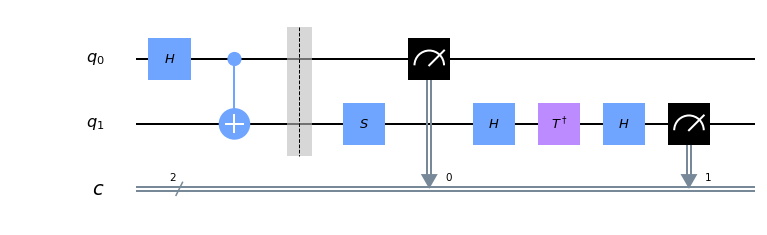

In [28]:
print("Circuit to measure ZV (A=Z=0° B=V=-45°)")
circuits[2].draw(output='mpl', scale=CIRCUIT_SIZE)

Circuit to measure XW (A=X=90° B=W=45°)


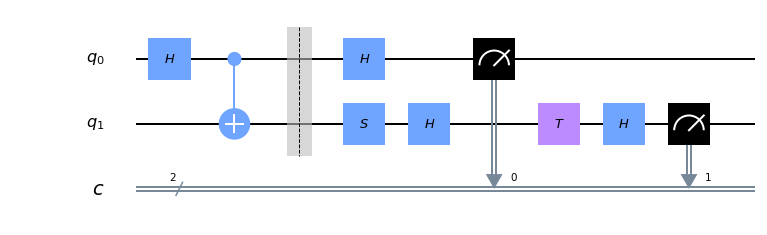

In [29]:
print("Circuit to measure XW (A=X=90° B=W=45°)")
circuits[3].draw(output='mpl', scale=CIRCUIT_SIZE)

Circuit to meas XV (A=X=90° B=V=-45°) (negative correlation)


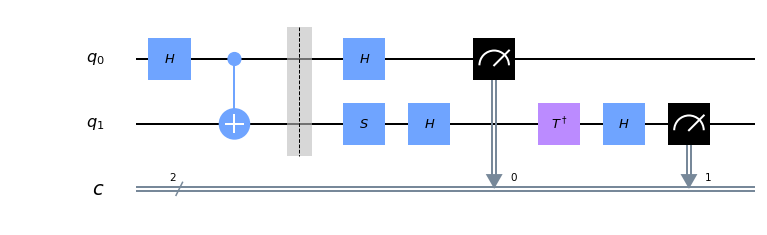

In [30]:
print("Circuit to meas XV (A=X=90° B=V=-45°) (negative correlation)")
circuits[4].draw(output='mpl', scale=CIRCUIT_SIZE)

after call execute()
queue_info: None
queue_info: QueueInfo(_status='PENDING_IN_QUEUE', estimated_complete_time=datetime.datetime(2020, 2, 6, 18, 33, 48, 186000, tzinfo=datetime.timezone.utc), estimated_start_time=datetime.datetime(2020, 2, 6, 18, 33, 11, 666000, tzinfo=datetime.timezone.utc), group_priority=1.0, hub_priority=0.290388, position=12, project_priority=1.0)

job status: PENDING_IN_QUEUE as of 16:53:18 UTC
position: 12
estimated start time: 18:33:11
estimated complete time: 18:33:48
estimated wait time is 100 minutes 29 seconds
job complete as of 18:05:42 UTC

 ZZ {'00': 493, '01': 25, '10': 32, '11': 474} 



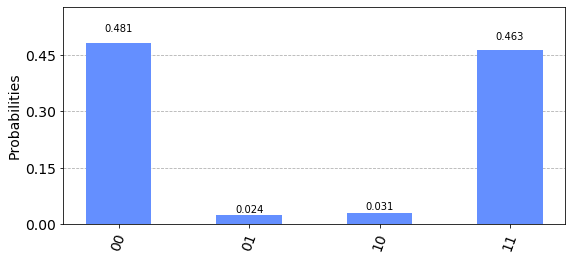

In [31]:
# execute, then review while waiting

from datetime import datetime, timezone
import time

# execute circuits
shots = 1024
job = execute(circuits, backend=backend, shots=shots)
print('after call execute()')

if backend.name() != 'qasm_simulator':
    try:
        info = None
        max_tries = 3
        while max_tries>0 and not info:
            time.sleep(1)  # need to wait a little bit before calling queue_info()
            info = job.queue_info()
            print(f'queue_info: {info}')
            max_tries -= 1
        now_utc = datetime.now(timezone.utc)
        print(f'\njob status: {info._status} as of {now_utc.strftime("%H:%M:%S")} UTC')
        print(f'position: {info.position}')
        print(f'estimated start time: {info.estimated_start_time.strftime("%H:%M:%S")}')
        print(f'estimated complete time: {info.estimated_complete_time.strftime("%H:%M:%S")}')
        wait_time = info.estimated_complete_time - now_utc
        wait_min, wait_sec = divmod(wait_time.seconds, 60)
        print(f'estimated wait time is {wait_min} minutes {wait_sec} seconds')
    except Exception as err:
        print(f'error getting job info: {err}')

result = job.result()  # blocks until complete
print(f'job complete as of {datetime.now(timezone.utc).strftime("%H:%M:%S")} UTC')

# gather data
counts = []
for i, label in enumerate(labels):
    circuit = circuits[i]
    data = result.get_counts(circuit)
    counts.append(data)

# show counts of Bell state measured in Z-axis
print('\n', labels[0], counts[0], '\n')

# show histogram of Bell state measured in Z-axis
# real devices are not yet perfect. due to noise.
add_missing_keys(counts[0])
plot_histogram(counts[0], figsize=HISTO_SIZE)

In [32]:
# tabular output
print('     (+)    (+)    (-)    (-)')
print('    P(00)  P(11)  P(01)  P(10)   correlation')
C = 0.0
for i in range(1, len(labels)):
    AB = 0.0
    print(f'{labels[i]}  ', end ='')
    N = 0
    for out in ('00', '11', '01', '10'):
        P = counts[i][out]/float(shots)
        N += counts[i][out]
        if out in ('00', '11'):
            AB += P
        else:
            AB -= P
        print(f'{P:.3f}  ', end='')
    if N != shots:
        print(f'ERROR: N={N} shots={shots}')
    print(f'{AB:6.3f}  {ab_labels[i]}')
    if labels[i] == 'XV':
        # the negative correlation - make it positive before summing it
        C -= AB
    else:
        C += AB

print(f"\nC = <AB> + <AB'> + <A'B> - <A'B'>")
print(f'  = <ZW> + <ZV>  + <XW>  - <XV>')
print(f'  = {C:.2f}\n')

if C <= 2.0:
    print("Einstein: 1   Quantum theory: 0")
else:
    print("Einstein: 0   Quantum theory: 1")

     (+)    (+)    (-)    (-)
    P(00)  P(11)  P(01)  P(10)   correlation
ZW  0.339  0.446  0.062  0.152   0.570  <AB>
ZV  0.473  0.352  0.127  0.049   0.648  <AB'>
XW  0.340  0.508  0.090  0.062   0.695  <A'B>
XV  0.131  0.117  0.446  0.306  -0.504  <A'B'>

C = <AB> + <AB'> + <A'B> - <A'B'>
  = <ZW> + <ZV>  + <XW>  - <XV>
  = 2.42

Einstein: 0   Quantum theory: 1


## Superposition and entanglement main points
* Superposition is demonstrated by the double-slit experiment, which suggests that a photon can be in two positions at once, because the interference pattern only forms if two photons interfere with each other, and it forms even if we send one photon at a time.

* Hidden variable theories seek to provide determinism to quantum physics.

* The principle of locality states that an influence of one particle on another cannot propagate faster than the speed of light.

* Entanglement cannot be explained by local hidden variable theories.

## Summary
* Two of the strangest concepts in quantum physics, superposition and entanglement, are used in quantum computing, and are waiting to be explored by you.

* You can run simple experiments on your laptop, and when you're ready, run them on a real quantum computer, over the cloud, for free.

* IBM's qiskit.org contains software, tutorials, and an active Slack community.

* My Github repo includes this presentation, tips on installing IBM's Qiskit on your laptop, and links for varying levels of explanations of superpositions and entanglements:
github.com/brandonwarren/intro-to-qubit
